In [1]:
# section 1 load all the necessary modules and packages
import glob
import time
import geopandas as gpd
import netCDF4 as nc4
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import Polygon
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import warnings
import sys
import os

plt.rc('font', family='Times New Roman', size=20)

def get_runoff(file_pattern, seg_ID_target): 
    merged = []
    for file_name in sorted(glob.glob(file_pattern)):
        ds = xr.open_dataset(file_name) # Open the dataset
        ID = np.array(ds['reachID'][:]).flatten()
        idx = np.where(np.isin(ds['reachID'], seg_ID_target))[0]
        merged.append(ds['IRFroutedRunoff'][:,idx])
    merged = xr.concat(merged, dim = 'time')
    return merged


In [2]:
seg_ID_targets = np.array([3030854,3037796,3043021,3044087]) # banff, calgary, medicine hat, saskatoon

# observation Bow at Banff
observation = pd.read_csv('../data/obs/05BB001.csv')
observation['Date'] = pd.DatetimeIndex(observation['Unnamed: 0'])
obs_Banff = observation.set_index('Date')

# observation Bow at Calgary
observation = pd.read_csv('../data/obs/05BH004.csv')
observation['Date'] = pd.DatetimeIndex(observation['Unnamed: 0'])
obs_Calgary = observation.set_index('Date')

# observation South Sask at Medicine Hat
observation = pd.read_csv('../data/obs/05AJ001.csv')
observation['Date'] = pd.DatetimeIndex(observation['Unnamed: 0'])
obs_Medicine = observation.set_index('Date')

# observation South Sask at Saskatoon
observation = pd.read_csv('../data/obs/05HG001.csv')
observation['Date'] = pd.DatetimeIndex(observation['Unnamed: 0'])
obs_Saskatoon = observation.set_index('Date')

# HDMA Banff
target_ID = np.array([3030854])
HDMA_Banff = get_runoff('../mizuRoute/output/South_Sask_HDMA.h.*.nc', target_ID) # no lake
HDMA_Banff_D = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll.h.*.nc', target_ID) # doll
HDMA_Banff_DH = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll_HYPE.h.*.nc', target_ID) # doll HYPE
HDMA_Banff_DHH = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll_HYPE_HANASAKI.h.*.nc', target_ID) # doll HYPE HANASAKI


# HDMA Calgary
target_ID = np.array([3037796])
HDMA_Calgary = get_runoff('../mizuRoute/output/South_Sask_HDMA.h.*.nc', target_ID) # no lake
HDMA_Calgary_D = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll.h.*.nc', target_ID) # doll
HDMA_Calgary_DH = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll_HYPE.h.*.nc', target_ID) # doll HYPE
HDMA_Calgary_DHH = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll_HYPE_HANASAKI.h.*.nc', target_ID) # doll HYPE HANASAKI


# HDMA Medicine Hat
target_ID = np.array([3043021])
HDMA_Medicine = get_runoff('../mizuRoute/output/South_Sask_HDMA.h.*.nc', target_ID) # no lake
HDMA_Medicine_D = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll.h.*.nc', target_ID) # doll
HDMA_Medicine_DH = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll_HYPE.h.*.nc', target_ID) # doll HYPE
HDMA_Medicine_DHH = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll_HYPE_HANASAKI.h.*.nc', target_ID) # doll HYPE HANASAKI

# HDMA Saskatoon
target_ID = np.array([3044087])
HDMA_Saskatoon = get_runoff('../mizuRoute/output/South_Sask_HDMA.h.*.nc', target_ID) # no lake
HDMA_Saskatoon_D = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll.h.*.nc', target_ID) # doll
HDMA_Saskatoon_DH = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll_HYPE.h.*.nc', target_ID) # doll HYPE
HDMA_Saskatoon_DHH = get_runoff('../mizuRoute/output/South_Sask_HDMA_lake_Doll_HYPE_HANASAKI.h.*.nc', target_ID) # doll HYPE HANASAKI



#############
#############
# merit Banff
target_ID = np.array([71028585])
merit_Banff = get_runoff('../mizuRoute/output/South_Sask_merit.h.*.nc', target_ID) # no lake
merit_Banff_D = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll.h.*.nc', target_ID) # doll
merit_Banff_DH = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll_HYPE.h.*.nc', target_ID) # doll HYPE
merit_Banff_DHH = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll_HYPE_HANASAKI.h.*.nc', target_ID) # doll HYPE HANASAKI

# merit Calgary
target_ID = np.array([71027942])
merit_Calgary = get_runoff('../mizuRoute/output/South_Sask_merit.h.*.nc', target_ID) # no lake
merit_Calgary_D = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll.h.*.nc', target_ID) # doll
merit_Calgary_DH = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll_HYPE.h.*.nc', target_ID) # doll HYPE
merit_Calgary_DHH = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll_HYPE_HANASAKI.h.*.nc', target_ID) # doll HYPE HANASAKI

# merit Medicine Hat
target_ID = np.array([71033569])
merit_Medicine = get_runoff('../mizuRoute/output/South_Sask_merit.h.*.nc', target_ID) # no lake
merit_Medicine_D = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll.h.*.nc', target_ID) # doll
merit_Medicine_DH = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll_HYPE.h.*.nc', target_ID) # doll HYPE
merit_Medicine_DHH = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll_HYPE_HANASAKI.h.*.nc', target_ID) # doll HYPE HANASAKI

# merit Saskatoon
target_ID = np.array([71021602])
merit_Saskatoon = get_runoff('../mizuRoute/output/South_Sask_merit.h.*.nc', target_ID) # no lake
merit_Saskatoon_D = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll.h.*.nc', target_ID) # doll
merit_Saskatoon_DH = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll_HYPE.h.*.nc', target_ID) # doll HYPE
merit_Saskatoon_DHH = get_runoff('../mizuRoute/output/South_Sask_merit_lake_Doll_HYPE_HANASAKI.h.*.nc', target_ID) # doll HYPE HANASAKI



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Fram

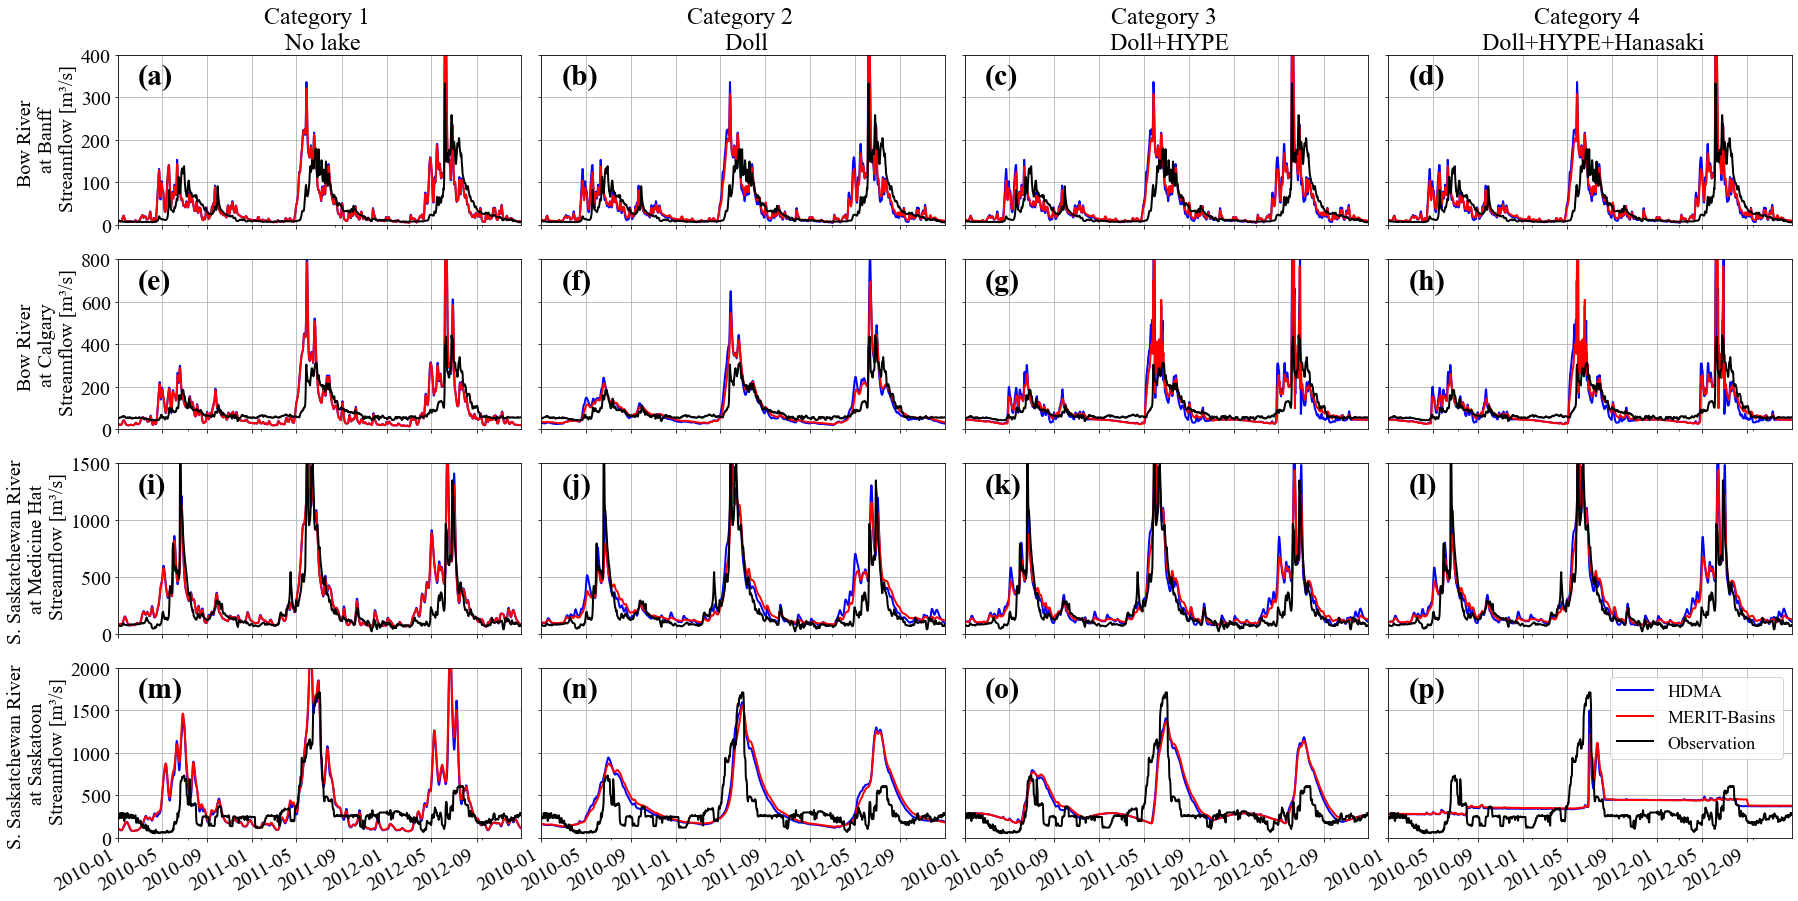

In [13]:
## plot
start_time = '2010-01-01'
end_time   = '2012-12-31'


fig, axes = plt.subplots(4, 4,\
                         figsize=(30, 16),\
                         sharex=True)
plt.subplots_adjust(wspace=0.05)
fig.patch.set_facecolor('white')

HDMA_config = {'color':'blue',
               'linewidth': 2}
merit_config = {'color':'red',
                'linewidth': 2}
obs_config = {'color':'black',
              'linewidth': 2}

# plot Saskatoon
HDMA_Saskatoon_DHH.plot(ax = axes[3,3], **HDMA_config, label = 'HDMA') # DDH case
HDMA_Saskatoon_DH.plot(ax = axes[3,2], **HDMA_config) # DH case
HDMA_Saskatoon_D.plot(ax = axes[3,1], **HDMA_config) # D case
HDMA_Saskatoon.plot(ax = axes[3,0], **HDMA_config) # no lake case
merit_Saskatoon_DHH.plot(ax = axes[3,3], **merit_config, label = 'MERIT-Basins') # DDH case
merit_Saskatoon_DH.plot(ax = axes[3,2], **merit_config) # DH case
merit_Saskatoon_D.plot(ax = axes[3,1], **merit_config) # D case
merit_Saskatoon.plot(ax = axes[3,0], **merit_config) # no lake case

# add observation
for i in np.arange(4):
    obs_Saskatoon['FLOW'].plot(ax=axes[3,i], **obs_config, label = 'Observation')

# plot Medicine hat
HDMA_Medicine_DHH.plot(ax = axes[2,3], **HDMA_config) # DDH case
HDMA_Medicine_DH.plot(ax = axes[2,2], **HDMA_config) # DH case
HDMA_Medicine_D.plot(ax = axes[2,1], **HDMA_config) # D case
HDMA_Medicine.plot(ax = axes[2,0], **HDMA_config) # no lake case
merit_Medicine_DHH.plot(ax = axes[2,3], **merit_config) # DDH case
merit_Medicine_DH.plot(ax = axes[2,2], **merit_config) # DH case
merit_Medicine_D.plot(ax = axes[2,1], **merit_config) # D case
merit_Medicine.plot(ax = axes[2,0], **merit_config) # no lake case

# add observation
for i in np.arange(4):
    obs_Medicine['FLOW'].plot(ax=axes[2,i], **obs_config)

# plot calgary
HDMA_Calgary_DHH.plot(ax = axes[1,3], **HDMA_config) # DDH case
HDMA_Calgary_DH.plot(ax = axes[1,2], **HDMA_config) # DH case
HDMA_Calgary_D.plot(ax = axes[1,1], **HDMA_config) # D case
HDMA_Calgary.plot(ax = axes[1,0], **HDMA_config) # no lake case
merit_Calgary_DHH.plot(ax = axes[1,3], **merit_config) # DDH case
merit_Calgary_DH.plot(ax = axes[1,2], **merit_config) # DH case
merit_Calgary_D.plot(ax = axes[1,1], **merit_config) # D case
merit_Calgary.plot(ax = axes[1,0], **merit_config) # no lake case

# add observation
for i in np.arange(4):
    obs_Calgary['FLOW'].plot(ax=axes[1,i], **obs_config)

# plot calgary
HDMA_Banff_DHH.plot(ax = axes[0,3], **HDMA_config) # DDH case
HDMA_Banff_DH.plot(ax = axes[0,2], **HDMA_config) # DH case
HDMA_Banff_D.plot(ax = axes[0,1], **HDMA_config) # D case
HDMA_Banff.plot(ax = axes[0,0], **HDMA_config, label = 'HDMA') # no lake case
merit_Banff_DHH.plot(ax = axes[0,3], **merit_config) # DDH case
merit_Banff_DH.plot(ax = axes[0,2], **merit_config) # DH case
merit_Banff_D.plot(ax = axes[0,1], **merit_config) # D case
merit_Banff.plot(ax = axes[0,0], **merit_config) # no lake case

# add observation
for i in np.arange(4):
    obs_Banff['FLOW'].plot(ax=axes[0,i], **obs_config)


# Share y-axis for the first row only
for i in np.arange(4):
    axes[3, i].set_ylim(0, 2000)
    axes[2, i].set_ylim(0, 1500)
    axes[1, i].set_ylim(0,  800)
    axes[0, i].set_ylim(0,  400)
    

# remove the labels
for i in np.arange(4):
    for j in np.arange(4):
        axes[i,j].set_xlabel('')
        axes[i,j].set_ylabel('')
        axes[i,j].grid()
        
# remove column 2 to end y tickes
for i in np.arange(1,4):
    axes[0,i].set_yticklabels([])
    axes[1,i].set_yticklabels([])
    axes[2,i].set_yticklabels([])
    axes[3,i].set_yticklabels([])
    
# set xlim
for i in np.arange(4):
    axes[0,0].set_xlim (pd.Timestamp(start_time), pd.Timestamp(end_time))

# set the titles
axes[0,0].set_ylabel('Bow River \n at Banff \n Streamflow [m³/s]')
axes[1,0].set_ylabel('Bow River \n at Calgary \n Streamflow [m³/s]')
axes[2,0].set_ylabel('S. Saskatchewan River \n at Medicine Hat \n Streamflow [m³/s]')
axes[3,0].set_ylabel('S. Saskatchewan River \n at Saskatoon \n Streamflow [m³/s]')

# set the titles
axes[0,0].set_title('Category 1 \n No lake')
axes[0,1].set_title('Category 2 \n Doll')
axes[0,2].set_title('Category 3 \n Doll+HYPE')
axes[0,3].set_title('Category 4 \n Doll+HYPE+Hanasaki')

# show legend
axes[3,3].legend(loc= 1, fontsize = 18)


# add lable for pannels
labels = ["(a)", "(b)", "(c)", "(d)",\
          "(e)", "(f)", "(g)", "(h)",\
          "(i)", "(j)", "(k)", "(l)",\
          "(m)", "(n)", "(o)", "(p)"]

for i, ax in enumerate(axes.ravel()):
    ax.text(0.05, 0.825, labels[i], transform=ax.transAxes, fontsize=30, fontweight='bold')

#
#plt.tight_layout()
plt.savefig('../fig/compariosn.png', dpi=400)
plt.savefig('../fig/compariosn.pdf')


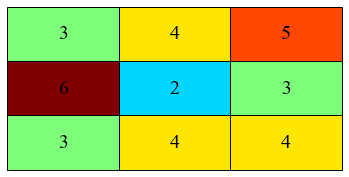

In [82]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [3, 6, 3],
    'B': [4, 2, 4],
    'C': [5, 3, 4]
}
df = pd.DataFrame(data)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 3))

# Plot an empty table
ax.axis('off')
tbl = Table(ax, bbox=[0, 0, 1, 1])

# Create a colormap
cmap = plt.get_cmap('jet')

# Get the cell values from the DataFrame
cell_text = []
for i in range(len(df)):
    cell_text.append(list(df.iloc[i]))

# Create the table
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.2, 1.2)
tbl.auto_set_column_width([0, 1, 2])

# Add cell colors based on values
for i, row in enumerate(cell_text):
    for j, val in enumerate(row):
        color = cmap(val / df.max().max())  # Normalize value and get color
        tbl.add_cell(i, j, width=0.2, height=0.2, text=str(val), loc='center', facecolor=color)

# Add the table to the figure
ax.add_table(tbl)

plt.show()


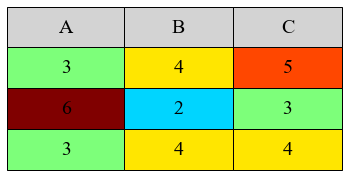

In [83]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [3, 6, 3],
    'B': [4, 2, 4],
    'C': [5, 3, 4]
}
df = pd.DataFrame(data)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 3))

# Plot an empty table
ax.axis('off')
tbl = Table(ax, bbox=[0, 0, 1, 1])

# Create a colormap
cmap = plt.get_cmap('jet')

# Get the cell values and column names from the DataFrame
cell_text = [list(df.columns)]  # Column names
for i in range(len(df)):
    cell_text.append(list(df.iloc[i]))  # Cell values

# Create the table
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.2, 1.2)
tbl.auto_set_column_width([0, 1, 2])

# Add cell colors based on values
for i, row in enumerate(cell_text):
    for j, val in enumerate(row):
        if i == 0:
            color = 'lightgray'  # Color for column names
        else:
            color = cmap(val / df.max().max())  # Normalize value and get color
        tbl.add_cell(i, j, width=0.2, height=0.2, text=str(val), loc='center', facecolor=color)

# Add the table to the figure
ax.add_table(tbl)

# Set x and y axis labels
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])

plt.show()
